This example script computes DOS and transmission function for the four-atom-width nanostrip
using the recursive Green's function algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nanonet.tb as tb
from nanonet.negf.recursive_greens_functions import recursive_gf
from nanonet.negf.greens_functions import surface_greens_function

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.0


Define the basis set consisting of one s-type orbital.

In [2]:
orb = tb.Orbitals('A')
orb.add_orbital('s', energy=-1.0)

Set TB parameters

In [3]:
tb.Orbitals.orbital_sets = {'A': orb}
tb.set_tb_params(PARAMS_A_A={"ss_sigma": 1.0})

Define atomic coordinates for the unit cell

In [4]:
input_file = """4
                Nanostrip
                A1 0.0 0.0 0.0
                A2 0.0 1.0 0.0
                A3 0.0 2.0 0.0
                A4 0.0 3.0 0.0
             """

Compute Hamiltonian matrices

In [5]:
h = tb.Hamiltonian(xyz=input_file, nn_distance=1.4)
h.initialize()
period = [0, 0, 1.0]
h.set_periodic_bc([period])
h_l, h_0, h_r = h.get_hamiltonians()

The verbosity level is 1
The radius of the neighbourhood is 1.4 Ang

---------------------------------

The xyz-file:
 4
                Nanostrip
                A1 0.0 0.0 0.0
                A2 0.0 1.0 0.0
                A3 0.0 2.0 0.0
                A4 0.0 3.0 0.0
             
---------------------------------

Basis set 
 Num of species {'A': 4} 


 A 
title | energy | n | l | m | s
------+--------+---+---+---+--
s     | -1.0   | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 
---------------------------------

Radial dependence function: None

---------------------------------

Discrete radial dependence function: None

---------------------------------

Unique distances: 
    1. Ang between atoms A and A
---------------------------------

Primitive_cell_vectors: 
 [[0, 0, 1.0]] 

---------------------------------



Compute DOS and transmission using Green's functions

In [6]:
energy = np.linspace(-5.0, 5.0, 150)
dos = np.zeros((energy.shape[0]))
tr = np.zeros((energy.shape[0]))

for j, E in enumerate(energy):
    # compute surface Green's functions
    L, R = surface_greens_function(E, h_l, h_0, h_r)
    # recursive Green's functions
    g_trans, grd, grl, gru, gr_left = recursive_gf(E, [h_l], [h_0 + L + R], [h_r])
    # compute DOS
    dos[j] = np.real(np.trace(1j * (grd[0] - grd[0].conj().T)))
    # compute left-lead coupling
    gamma_l = 1j * (L - L.conj().T)
    # compute right-lead coupling
    gamma_r = 1j * (R - R.conj().T)
    # compute transmission
    tr[j] = np.real(np.trace(gamma_l.dot(g_trans).dot(gamma_r).dot(g_trans.conj().T)))

tr = np.array(tr)
dos = np.array(dos)

Plot DOS and transmission spectrum

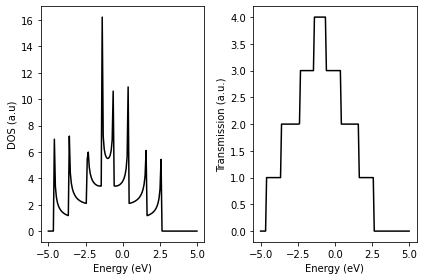

In [7]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(energy, dos, 'k')
ax[0].set_ylabel(r'DOS (a.u)')
ax[0].set_xlabel(r'Energy (eV)')

ax[1].plot(energy, tr, 'k')
ax[1].set_ylabel(r'Transmission (a.u.)')
ax[1].set_xlabel(r'Energy (eV)')
fig.tight_layout()
plt.show()